In this notebook we will be exploring the IPPS dataset.

# Imports

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator

In [4]:
data = pd.read_csv('IPPS_2013.csv')

data.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Provider HRR,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,98,$37988.98,$5872.19,$4838.32
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,34,$15554.88,$6053.29,$5255.65
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,30,$40380.10,$5319.83,$4150.87
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,17,$22026.24,$5767.88,$4268.35
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,17,$45663.06,$5785.12,$4886.29


The data contains the DRG (diagnosis-related group) definition, information about the provider, the number of discharges for each DRG, and the average covered charges, total payments, and Medicare payments for each DRG for each provider.

Let's try grouping by DRG and looking at how much the charges and payments vary by provider.  We'll first need to convert the strings representing the dollar amounts into numbers.

In [3]:
def str_to_num(s):
    """
    Return a float representing the dollar amount in string s
    String s is of the form '$xxxx.xx'
    """
    return float(s[1:])

data['Average Covered Charges Num'] = data['Average Covered Charges'].apply(str_to_num)
data['Average Total Payments Num'] = data['Average Total Payments'].apply(str_to_num)
data['Average Medicare Payments Num'] = data['Average Medicare Payments'].apply(str_to_num)

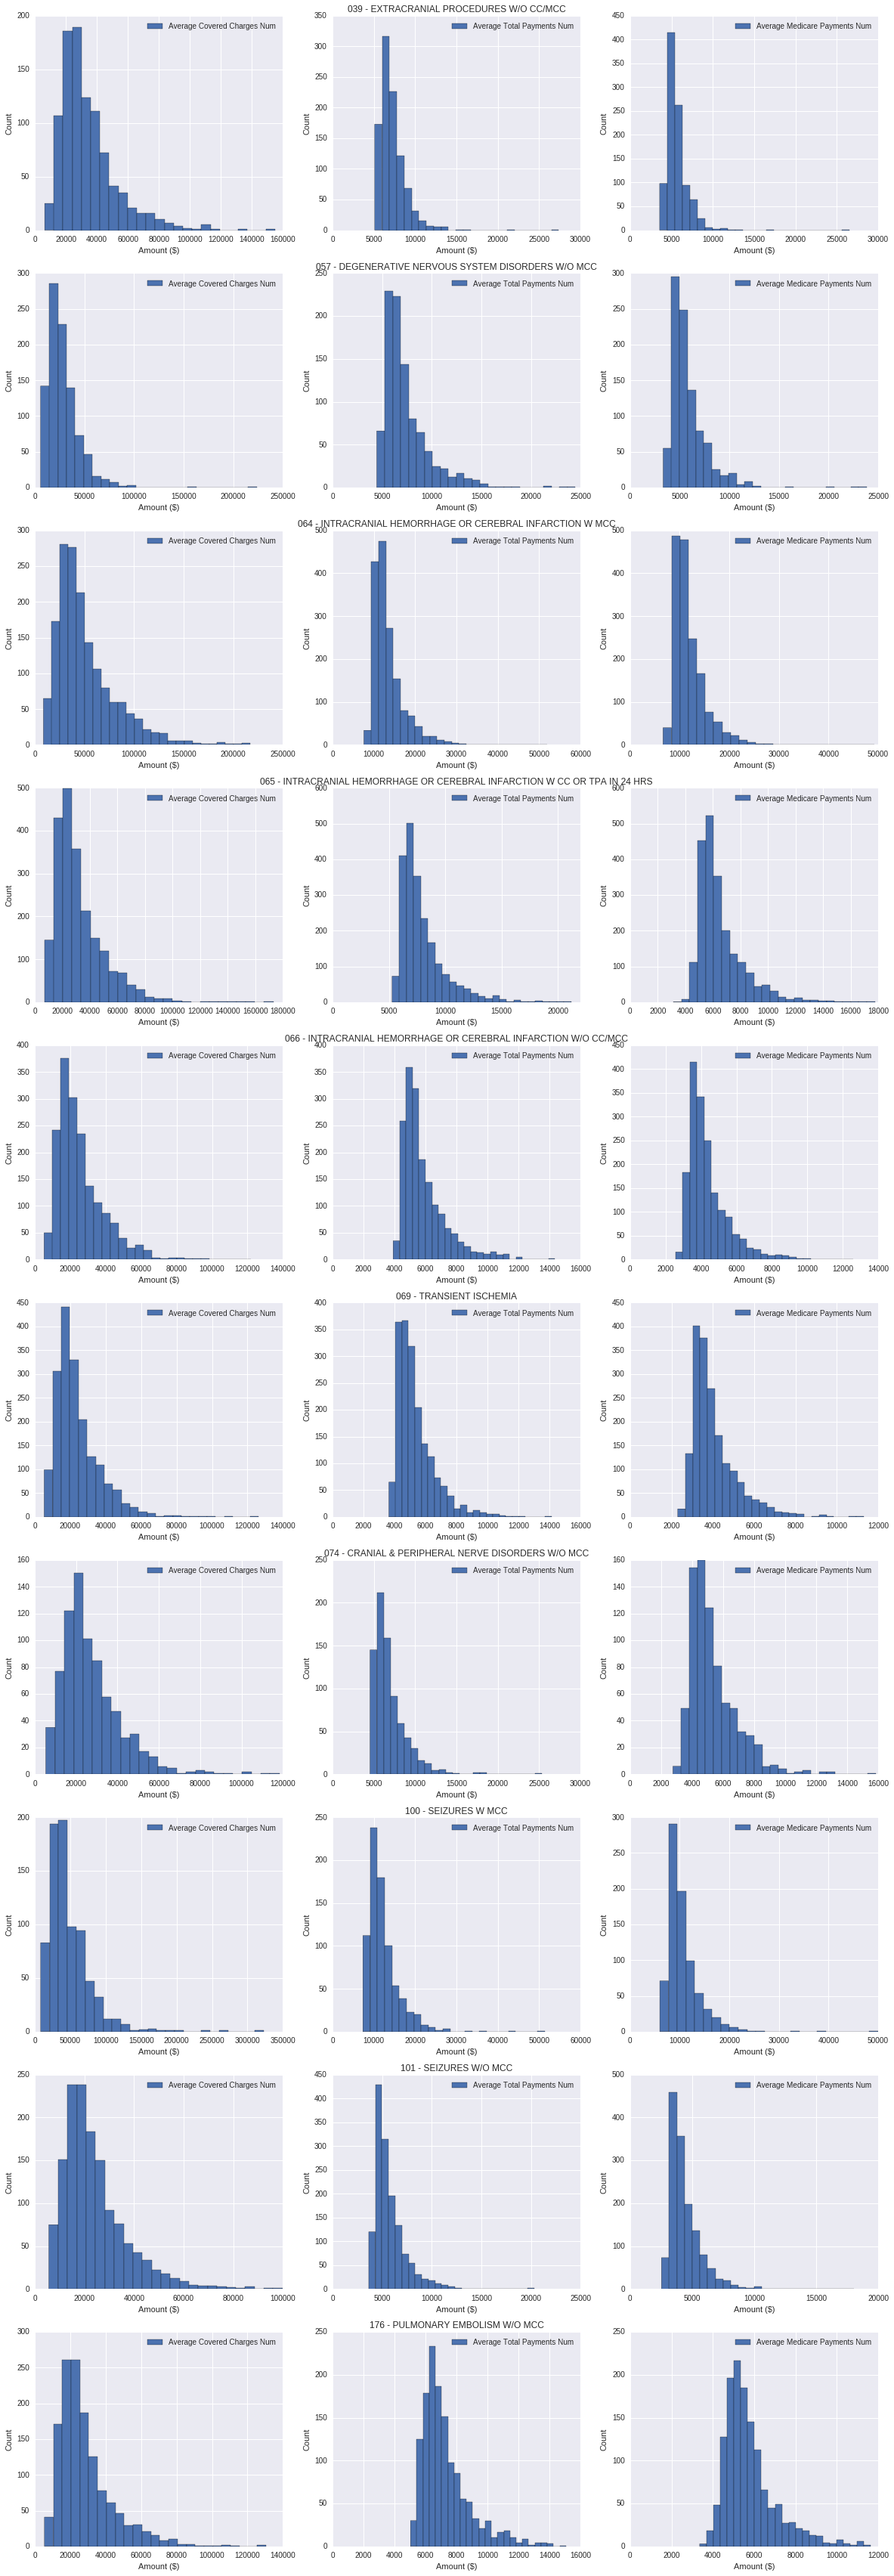

In [4]:
drgs = data.groupby('DRG Definition')
cols = ['Average Covered Charges Num', 'Average Total Payments Num', 'Average Medicare Payments Num']

n = 10  # Limit the number to show
i = 1
plt.figure(figsize=(20,60))
for drg_name,drg in drgs:
    for j,col in enumerate(cols):
        plt.subplot(n, 3, i)
        drg[col].hist(bins=25)
        xmin, xmax = plt.xlim()
        plt.xlim(0, xmax)
        plt.xlabel('Amount ($)')
        plt.ylabel('Count')
        plt.legend([col])
        if j == 1:
            plt.title(drg_name)
        i += 1
    if i > n * len(cols):
        break


It looks like there's a common trend of the distributions being skewed to the right.  This makes sense to some extent because things cannot cost a negative amount of money.  It also appears that the covered charges are pretty significantly higher than the total payments or medicare payments.

We have geocoded the providers in the dataset and saved the data in another CSV file.  Let's load this and join it with our existing data to look at things as a function of latitude and longitude.

In [5]:
geo_data = pd.read_csv('provider_geocodes_google.csv')
data = data.merge(geo_data, how='left')

data.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Provider HRR,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Average Covered Charges Num,Average Total Payments Num,Average Medicare Payments Num,Latitude,Longitude
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,98,$37988.98,$5872.19,$4838.32,37988.98,5872.19,4838.32,31.216725,-85.363068
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,34,$15554.88,$6053.29,$5255.65,15554.88,6053.29,5255.65,34.204811,-86.101860
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,30,$40380.10,$5319.83,$4150.87,40380.10,5319.83,4150.87,34.793845,-87.683155
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,17,$22026.24,$5767.88,$4268.35,22026.24,5767.88,4268.35,33.596457,-86.667650
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,17,$45663.06,$5785.12,$4886.29,45663.06,5785.12,4886.29,33.252444,-86.813555


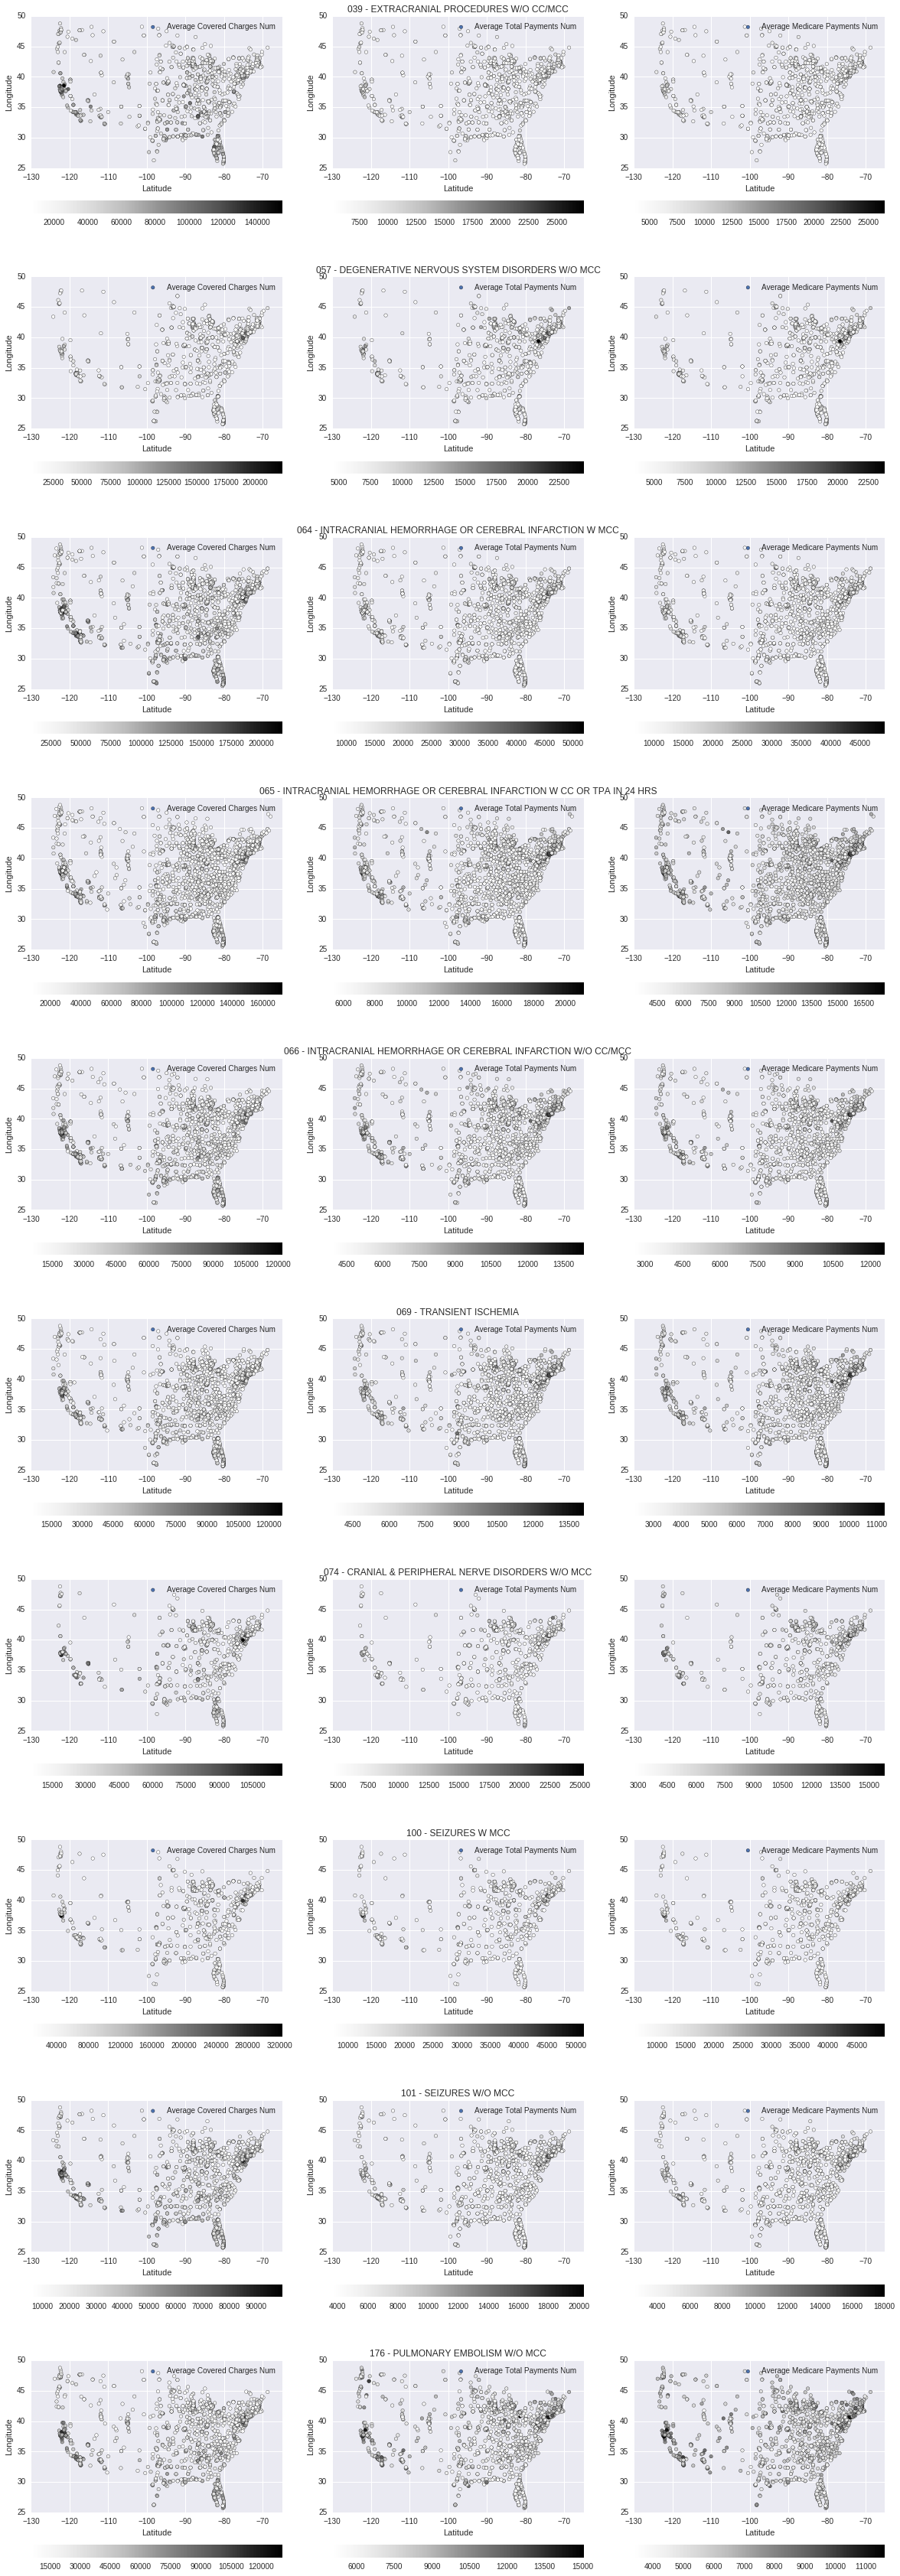

In [6]:
drgs = data[data.Latitude.notnull()].groupby('DRG Definition')
cols = ['Average Covered Charges Num', 'Average Total Payments Num', 'Average Medicare Payments Num']

n = 10  # Limit the number to show
i = 1
plt.figure(figsize=(20,60))
for drg_name,drg in drgs:
    for j,col in enumerate(cols):
        plt.subplot(n, 3, i)
        drg = drg[drg.Latitude.notnull()]
        plt.scatter(drg.Longitude, drg.Latitude, c=drg[col])
        plt.xlabel('Latitude')
        plt.ylabel('Longitude')
        plt.legend([col])
        plt.colorbar(orientation='horizontal')
        plt.axis((-130,-65,25,50))
        if j == 1:
            plt.title(drg_name)
        i += 1
    if i > n * len(cols):
        break

Let's look at which procedures and costs are most common

In [7]:
dischargeCountByDrg = {}
for drg_name,drg in drgs:
    dischargeCountByDrg[drg_name] = drg['Total Discharges'].sum()
sortedDrgByCount = sorted(dischargeCountByDrg.items(), key=operator.itemgetter(1))
#print sortedDrgByCount

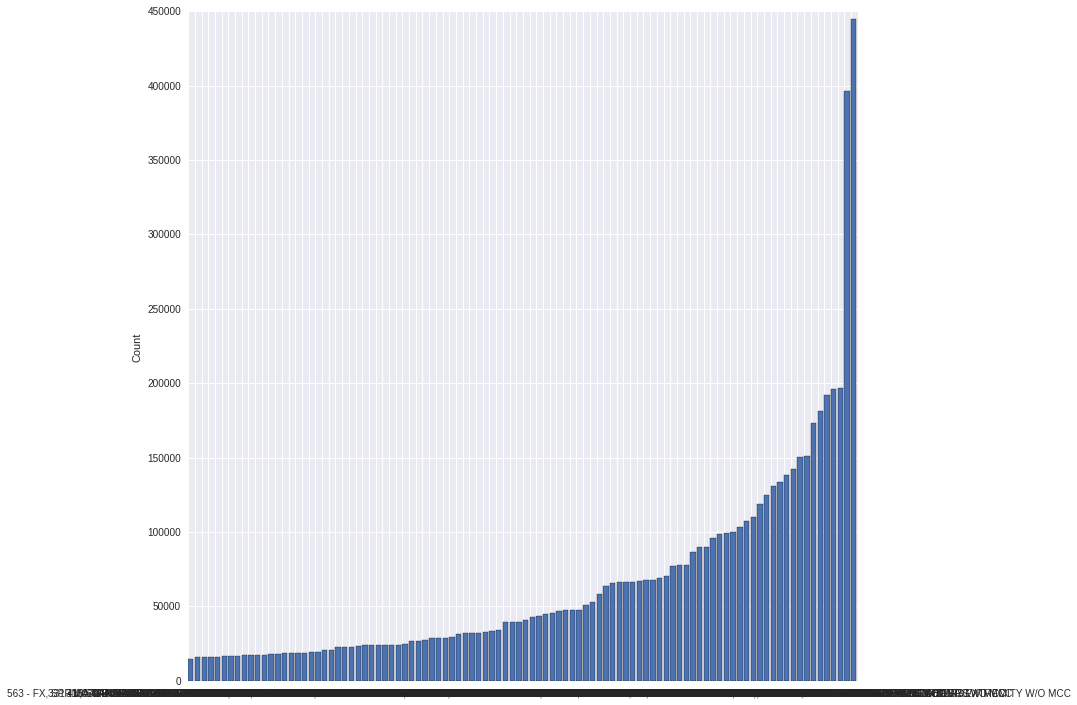

In [8]:
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.ylabel('Count')
plt.bar(np.arange(len(sortedDrgByCount)), [x[1] for x in sortedDrgByCount])
plt.xticks(np.arange(len(sortedDrgByCount)), [x[0] for x in sortedDrgByCount]);

Since the labels are completely unreadable with this many DRGs let just look at the top 10

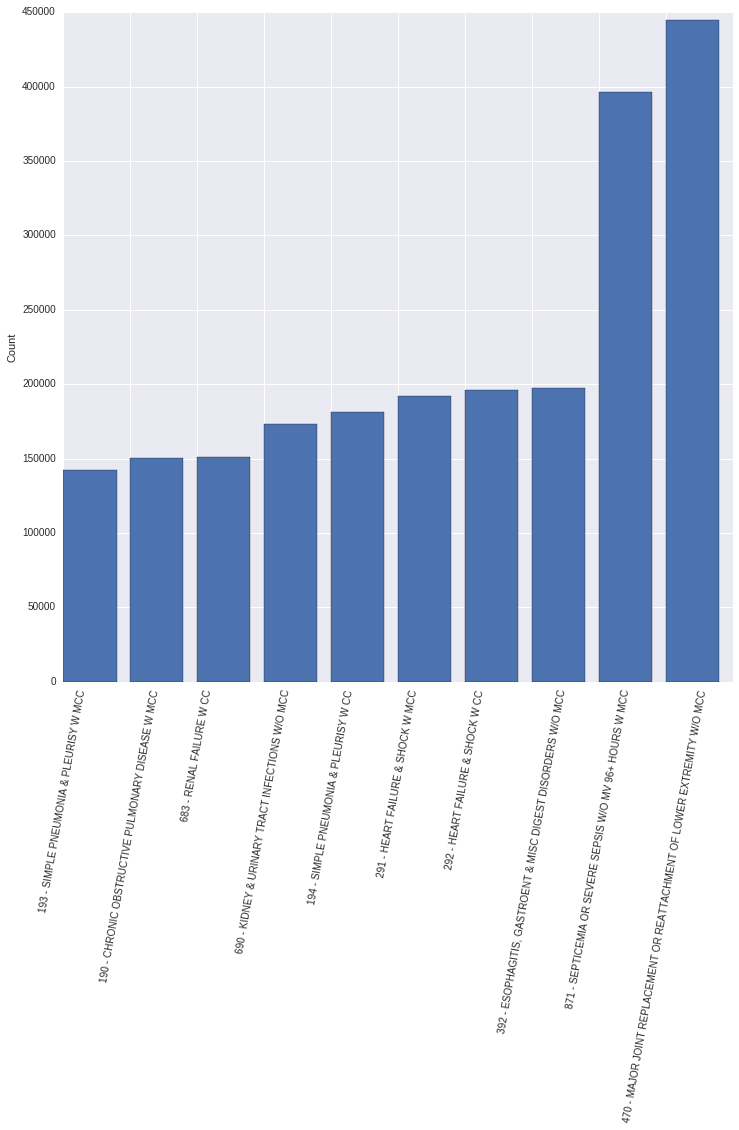

In [9]:
plt.figure(figsize=(width, height))
# plt.setp(labels, rotation=60)
top10 = sortedDrgByCount[-10:]
plt.ylabel('Count')
plt.bar(np.arange(len(top10)), [x[1] for x in top10])
plt.xticks(np.arange(len(top10)), [x[0] for x in top10], rotation=80 );